# Predicting customer churn using AIR dataset

**Project overview**

- Data analysis
- Data Preprocessing
- ML classification
- Statistics

The goal of this project is to try to predict the churn behaviour of customers based on the dataset from a fictive company. A churn customer is a customer that leaves the business for another company. Preventing customers from churning is important for telemarketing businesses since the barriers to entry for switching company are low and it is a lot less expensice to try at keep a customer than acquiring new customers. 

## Data analysis

The dataset is loaded into python and some of the features that are thought to be irrelevant for the performance of the classification are droped. These include the 'PERMISSION' features, which only describes if the company has permission to concat the customer through various sources and other features which were found to have too many Nan's or Null values. 

The following code will be explained:

In [5]:
from data.Functions import *
# Fetching and prepreparing data 
df = pd.read_excel("data/20190303_Dataset.xlsx")

# Outputting how imbalanced the dataset is
df['CHURN_TARGET'].value_counts()

# Missing values in features    
missingV = (df.isnull().sum())
print(missingV)

Ndf = ['CONZOOM_GROUP_NAME','PERMISSION_EMAIL','PERMISSION_SMS','PERMISSION_PHONE','CURRENT_TERMINAL','PREVIOUS_TELECOMPANY','STREAMING_MUSIC_TRACKS']

# Unique values in features
UQ = df.nunique()
print(UQ)

# Specifying categories
categories_labels = list(df.columns) 

# --------------------------------------
# Redefining the features
#---------------------------------------
df['GENDER'].replace({np.nan: 0, 'M': 0, 'K': 1}, inplace=True)
df['SALES_POINT'].replace({'agent': 0, 'user': 1}, inplace=True)

CHURN_TARGET                             0
CUSTOMER_LIFETIME                        0
PAYMENT_METHOD                           0
GENDER                                  11
PERMISSION_EMAIL                         0
PERMISSION_SMS                           0
PERMISSION_PHONE                         0
SALES_POINT                              0
MV_PRODUCT_PRICE                         0
ADDITIONAL_SERVICE_5GB_DATA              0
ADDITIONAL_SERVICE_UNLIMITED_DATA        0
ADDITIONAL_SERVICE_ROAMING_DATA          0
ADDITIONAL_SERVICE_ROAMING_VOICE         0
CONZOOM_GROUP_NAME                       0
CONZOOM_EMPLOYMENT                       0
CONZOOM_CAR                              0
CONZOOM_CHILDREN                         0
CONZOOM_CIVILSTATE                       0
CONZOOM_OWNERSHIP                        0
CONZOOM_WEALTH                           0
CONZOOM_AGE                              0
CONZOOM_EDUCATION                        0
CURRENT_TERMINAL                         0
TERMINAL_TY

After preparing the dataframe for analysis all the feature-values were grouped in their 'CHURNED' and 'NOT CHURNED' counterparts. The features could hence be sliced into differnt categories: categorical, numerical, medium sized, large etc.

In [11]:
print(G_df_perc)

[      CUSTOMER_LIFETIME  CHURNED  TOTAL  Percent Churned
0                     0        1      2        50.000000
1                     8        1     10        10.000000
2                    10        2    117         1.709402
3                    11        2     83         2.409639
4                    14        2      5        40.000000
...                 ...      ...    ...              ...
1390               2172        1      5        20.000000
1391               2173        1      2        50.000000
1392               2175        1      1       100.000000
1393               2177        1      3        33.333333
1394               2210        1      2        50.000000

[1395 rows x 4 columns],                            PAYMENT_METHOD  CHURNED  TOTAL  Percent Churned
0                     automatisk betaling     1566  70855         2.210147
1  automatisk betaling (uden auto-optank)      274   5825         4.703863
2                   automatisk optankning       76   3576       

In [10]:
#--------------------------------------------------------------
#         Grouping target with features
#--------------------------------------------------------------

G_df_perc = []
G_df = []

for column in categories_labels[1:]:
    G_df_perc.append( churn_percent( column , df) )  
for column in categories_labels[1:]:
    G_df.append( cat_churn( column , df) ) 
    
#categorical columns
S_cat = UQ[UQ < 6].keys().tolist()
S_cat = [x for x in S_cat if x not in Ndf]
#Medium sized features
M_unique = [ n for n,i in enumerate(UQ) if i>5 and i<101 ]
M_cat =list([ categories_labels[i] for n,i in enumerate(M_unique)if i not in Ndf ])
#ALL Large features
L_cat = UQ[UQ > 10].keys().tolist()
L_cat = [x for x in L_cat if x not in Ndf]
# Only Xlarge features
XL_cat = UQ[UQ > 100].keys().tolist()
XL_cat = [x for x in XL_cat if x not in Ndf]
# Only the features with 10 categories
ten_cat =  UQ[UQ == 10].keys().tolist()
ten_cat = [x for x in ten_cat if x not in Ndf]
# boolean fatures
bool_cat = UQ[UQ == 2].keys().tolist()
bool_cat = [x for x in bool_cat if x not in Ndf]
#categorical features that aren't bool
S_cat_rbool = [i for i in S_cat if i not in bool_cat]

The features will now be plotted and analysed:

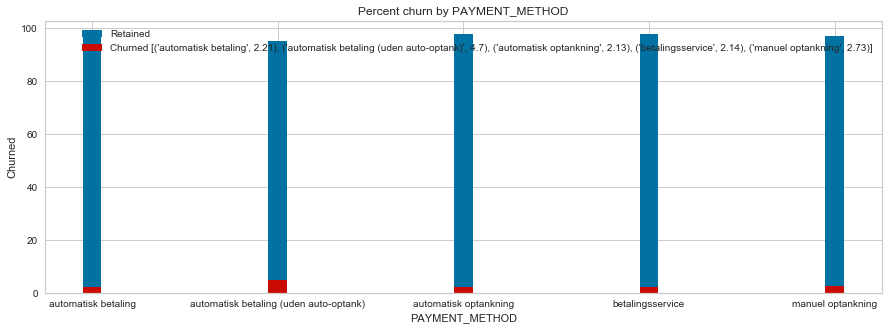

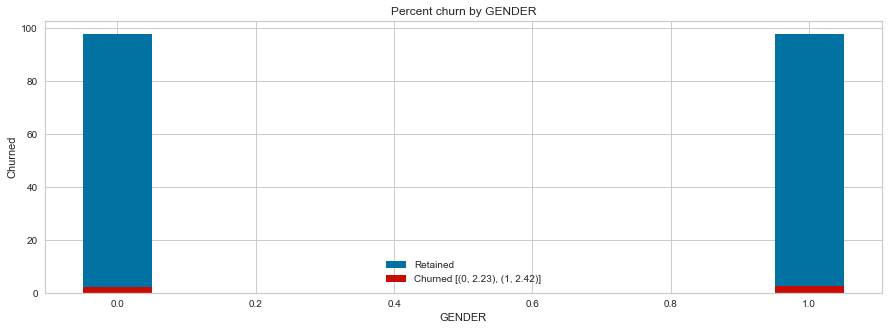

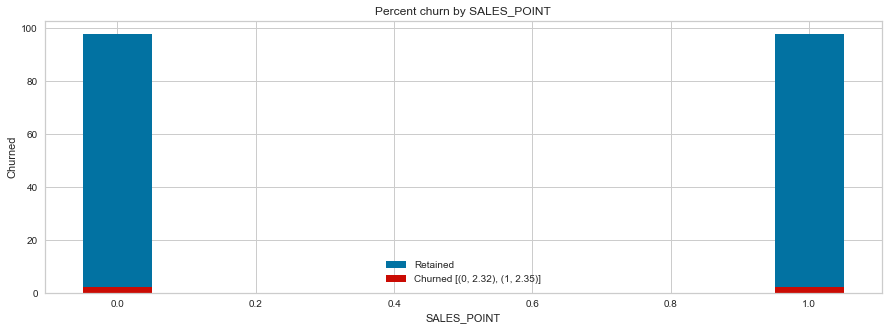

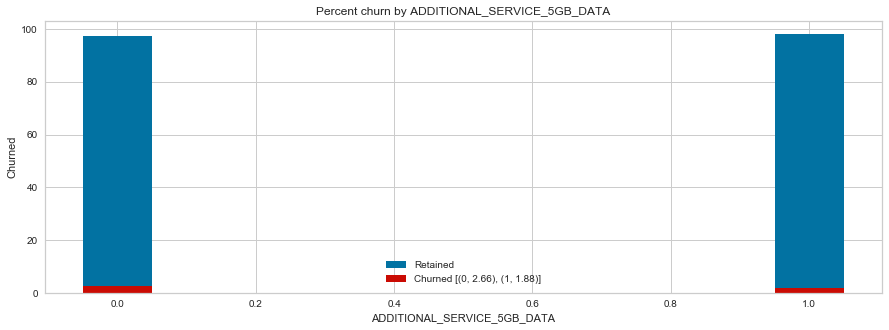

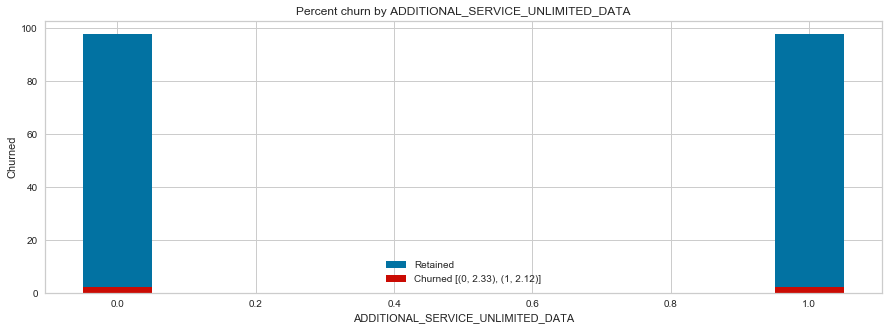

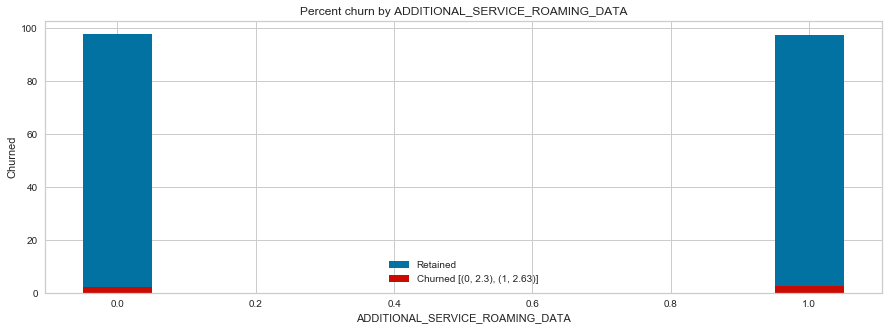

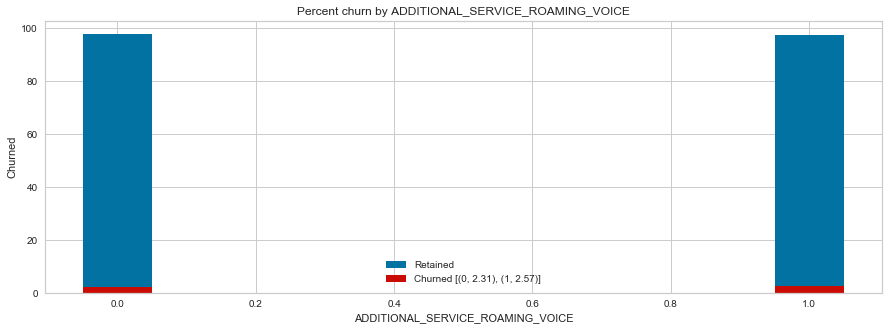

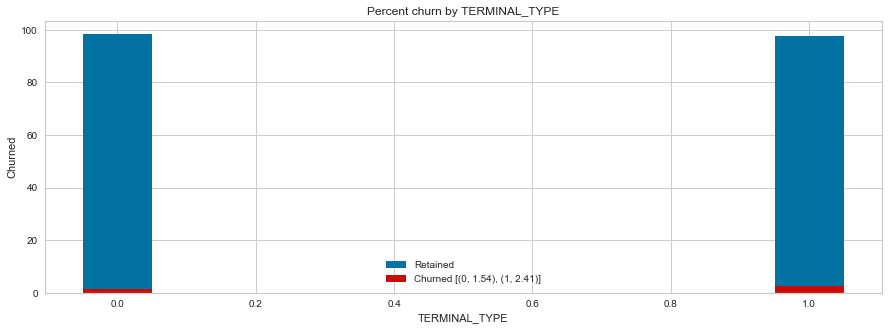

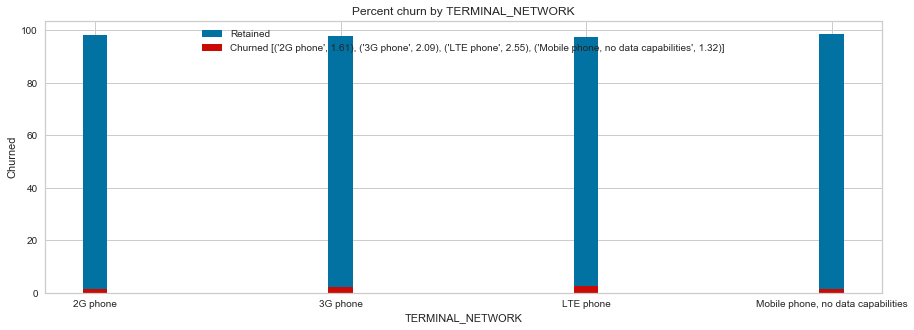

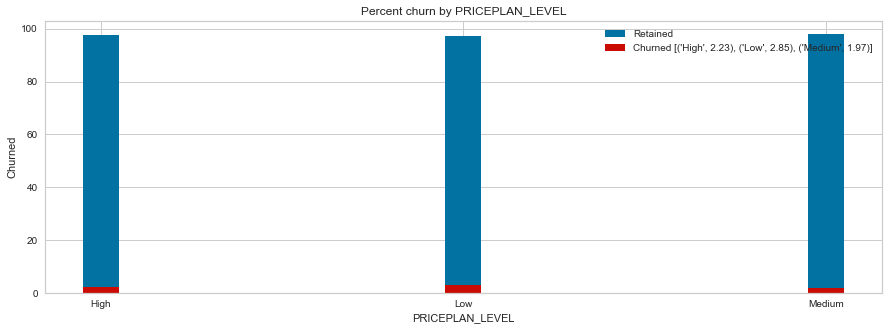

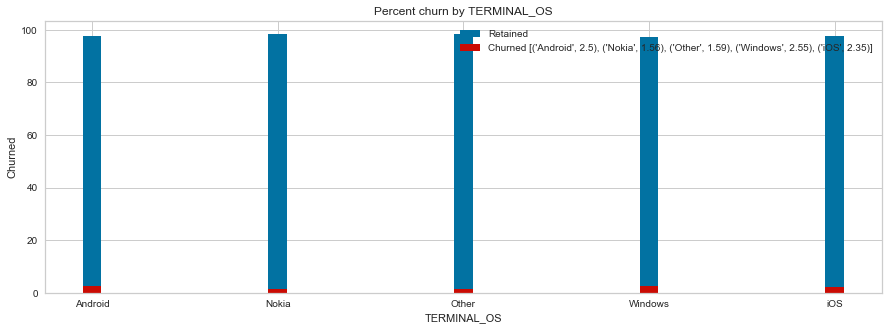

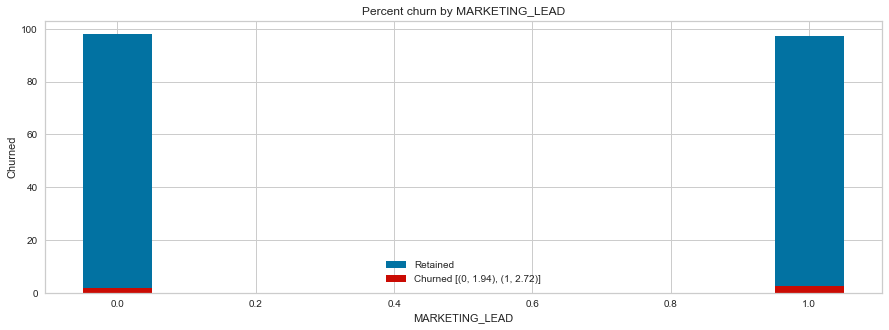

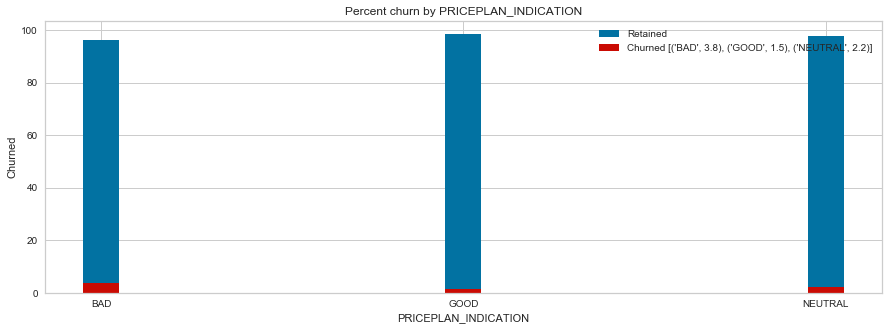

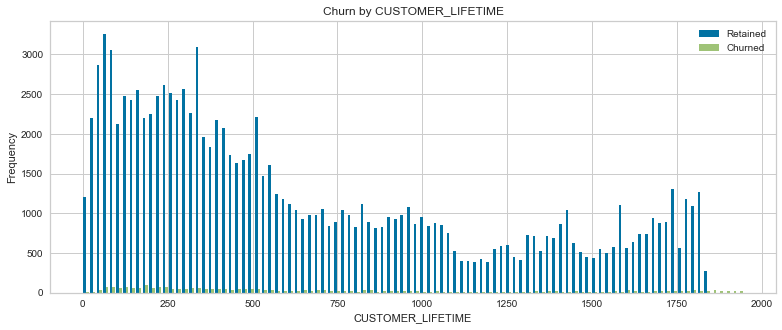

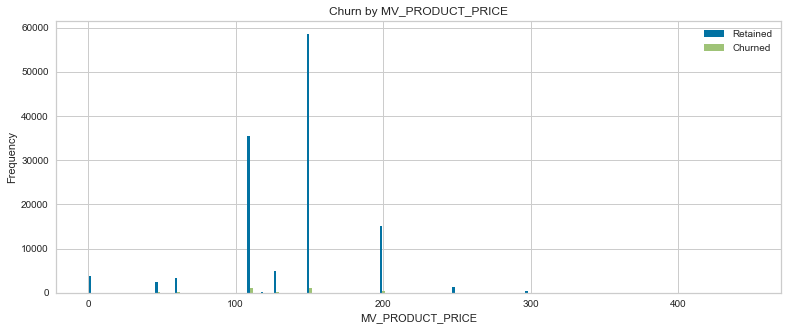

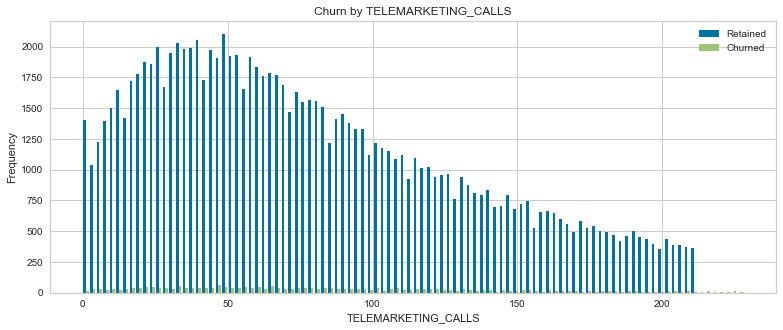

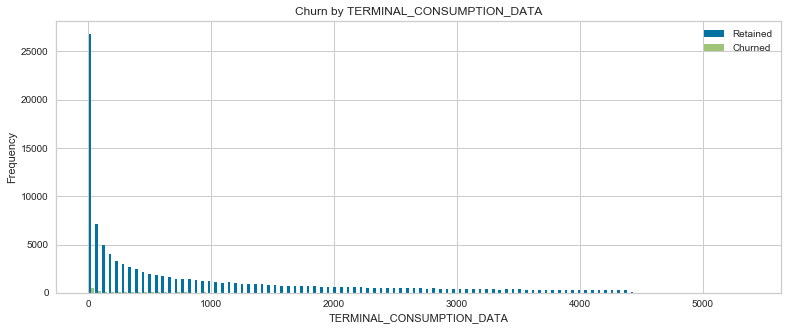

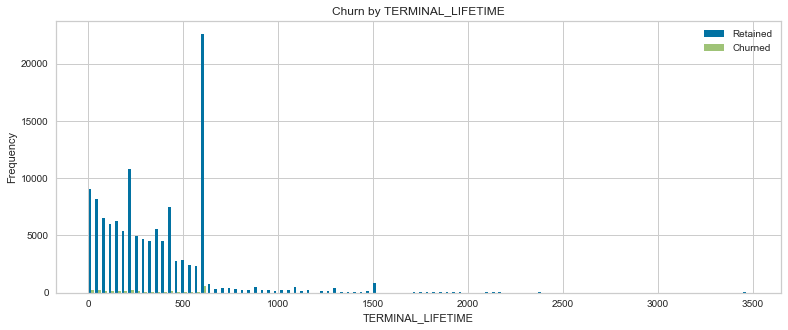

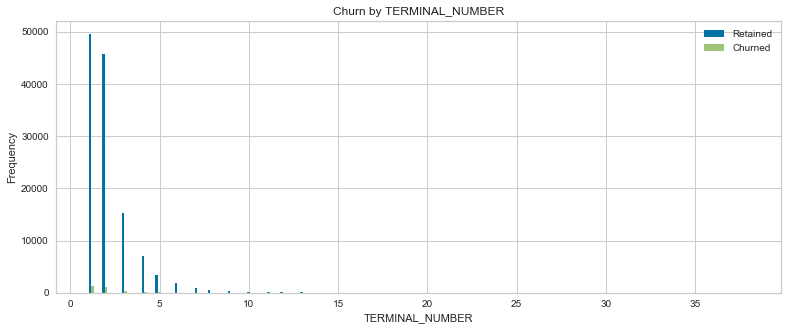

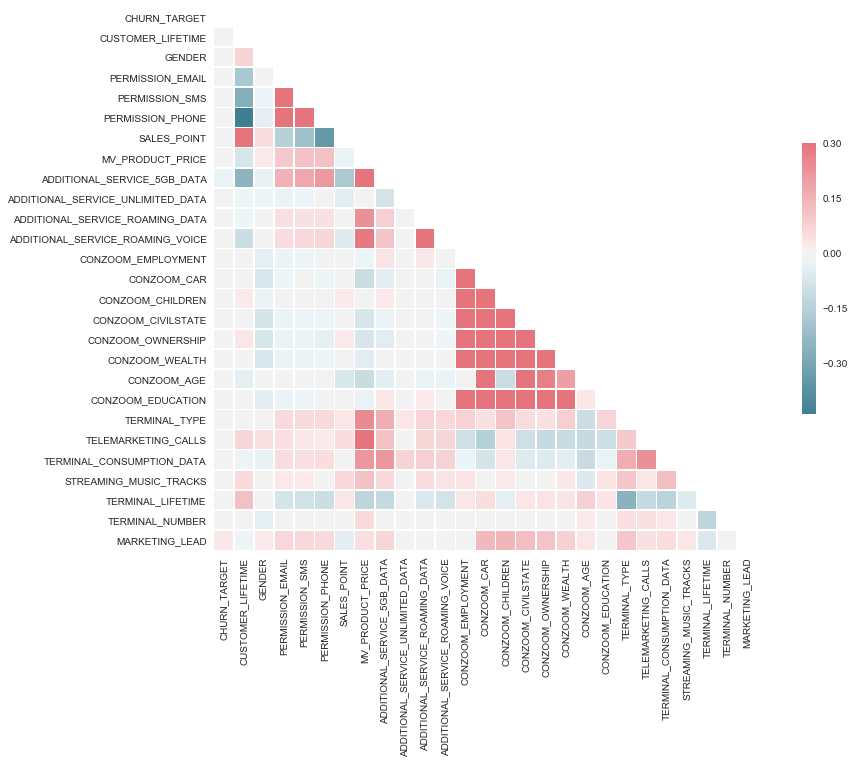

In [16]:
plotAllFeatPerc(G_df_perc,S_cat[1:],UQ,categories_labels)
histogram(L_cat[:],df,100,UQ,3)
Correlation(df)

I found the features that have the largest CHURN difference between variables. 

In [13]:
MaxDif = ChurnedSmallFeat(G_df_perc,S_cat[1:],categories_labels)
DropFeatures = MaxDif[:7,1]
SelectedFeatures= MaxDif[-6:,1]
print(DropFeatures)
print(SelectedFeatures)

['ADDITIONAL_SERVICE_5GB_DATA' 'ADDITIONAL_SERVICE_ROAMING_DATA'
 'ADDITIONAL_SERVICE_ROAMING_VOICE' 'ADDITIONAL_SERVICE_UNLIMITED_DATA'
 'GENDER' 'MARKETING_LEAD' 'PAYMENT_METHOD']
['PRICEPLAN_INDICATION' 'PRICEPLAN_LEVEL' 'SALES_POINT' 'TERMINAL_NETWORK'
 'TERMINAL_OS' 'TERMINAL_TYPE']


## Preprocessing

After analysing the dataset, the data could be preprocessed so that it can be used in ML algorithms:

In [50]:
Predf = df.copy()
#string features are mapped into indicator values/hot-encoded
Predf = pd.get_dummies(data = Predf,columns = S_cat_rbool )

#Scaling numerical features
std = StandardScaler()
scaled = std.fit_transform(Predf[L_cat])
scaled = pd.DataFrame(scaled,columns=L_cat)

#Merging scaled values for numerical columns into the Dataframe
df_copy = Predf.copy()
Predf = Predf.drop(columns = L_cat,axis = 1)
Predf = Predf.merge(scaled,left_index=True,right_index=True,how = "left")


#splitting train and test data 
DataFr = Predf
cols    = [i for i in DataFr.columns[1:] if i not in list(Ndf)]
target_col = 'CHURN_TARGET'
X = DataFr[[i for i in DataFr.columns[1:] if i not in list(Ndf)]]
Y = DataFr[target_col]

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.3)

The data is mapped and scaled as can be seen and thereafter split into test and training sets. In addition to this another dataset of train and test samples was made using the SMOTE technique. This was done in order to try at fix the problem of having a very unbalanced dataset.

In [51]:
#Oversampled dataset FIX
smote_X = DataFr[[i for i in DataFr.columns[1:] if i not in list(Ndf)]]
smote_Y = DataFr[target_col]

#Split smote train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .3 ,
                                                                         random_state = 111)
#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y)

##---------------------------------------------------------
### OR USING resample()
##----------------------------------------------------------
#data_minority_upsampled = resample(data_minority,
#replace=True,
#n_samples=60174, #same number of samples as majority classe
#random_state=1) #set the seed for random resampling
### Combine resampled results
#data_upsampled = pd.concat([data_majority, data_minority_upsampled])

#data_upsampled[target_col].value_counts()
#x = data_upsampled[[i for i in data_upsampled.columns[1:]]]
#y = data_upsampled[target_col]
###-------------------------------------------------------------

## ML classification

Classifying the two states, the 'Churned' and 'Not Churned' customer, we will se the classifiers: Logistic regression, KNN, XGB and LGBM. I use a for-loop in order to use both datasets created.

LogisticRegression(C=100, class_weight={0: 0.95, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.16      0.27     37645
           1       0.02      0.92      0.05       875

   micro avg       0.18      0.18      0.18     38520
   macro avg       0.51      0.54      0.16     38520
weighted avg       0.97      0.18      0.27     38520

Accuracy   Score :  0.17611630321910696
Score:  0.176 
F1 score:  0.048 
- - - - -  

Area under curve :  0.5394129366449728 



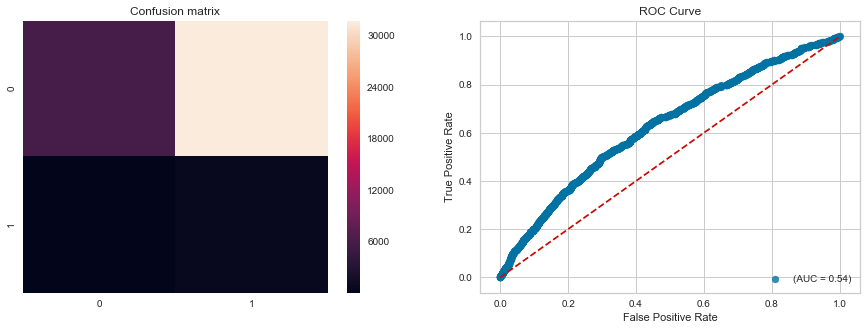

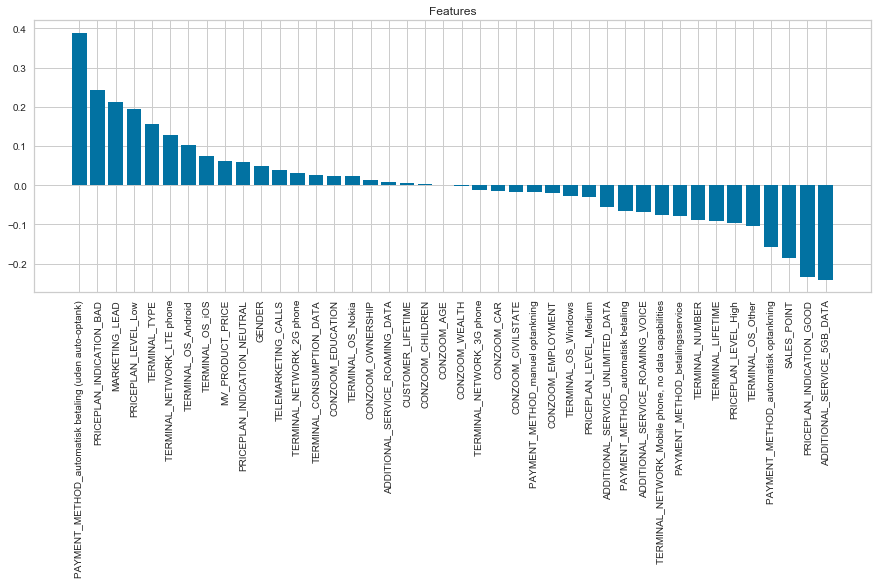

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.84      0.91     37645
           1       0.10      0.80      0.18       875

   micro avg       0.84      0.84      0.84     38520
   macro avg       0.55      0.82      0.55     38520
weighted avg       0.97      0.84      0.89     38520

Accuracy   Score :  0.8369158878504673
Score:  0.837 
F1 score:  0.182 
- - - - -  

Area under curve :  0.8177706771910517 

RandomForestClassifier(bootstrap=True, class_weight={0: 0.95, 1: 2},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=4, 

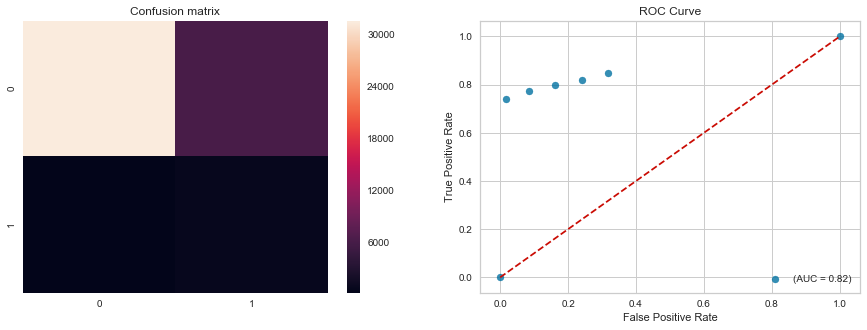

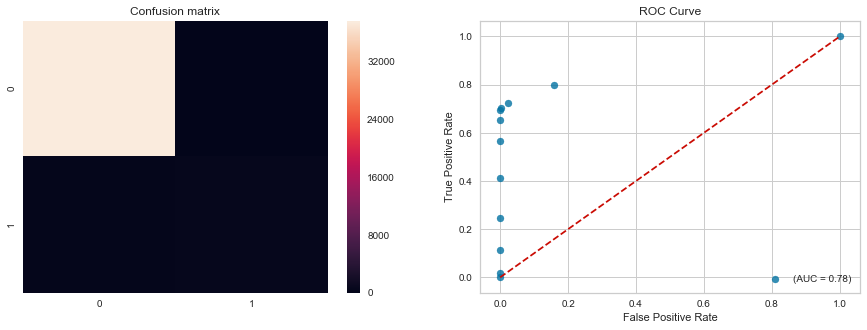

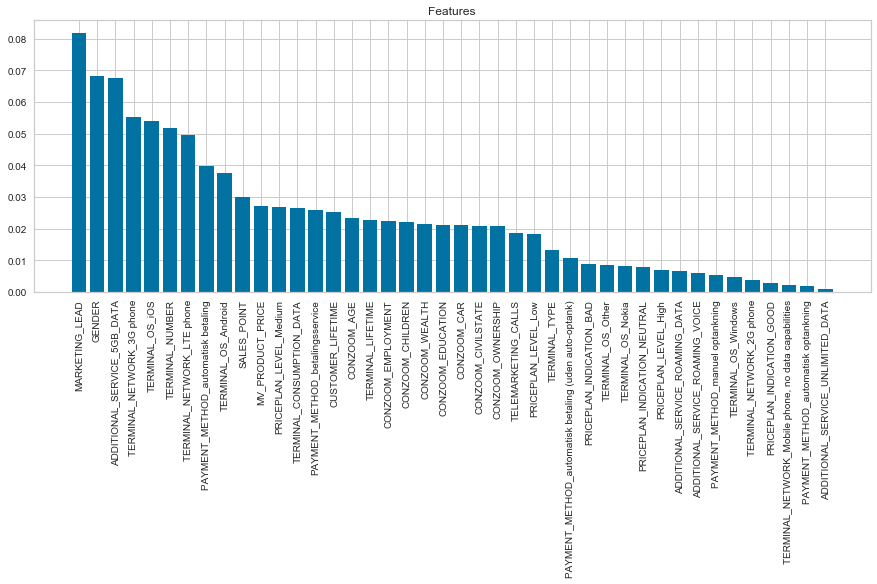

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 0.95, 1: 2},
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.9,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     37645
           1       0.91      0.62      0.74       875

   micro avg       0.99      0.99      0.99     38520
   macro avg       0.95      0.81      0.87     38520
weighted avg       0.99      0.99      0.99     38520

Accuracy   Score :  0.9899273104880582
Score:  0.99 
F1 score:  0.736 
- - - - -  

Area under curve :  0.8089837770145912 



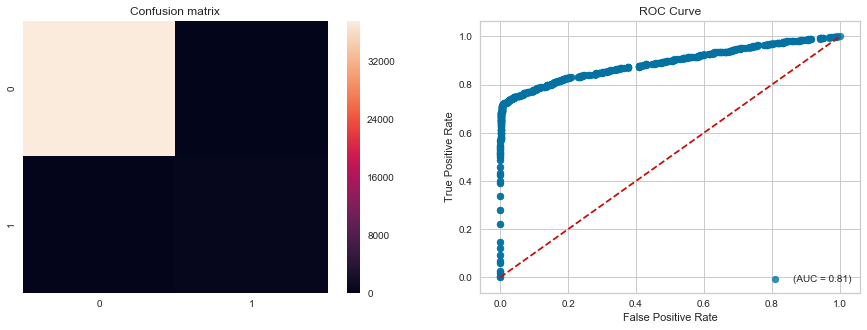

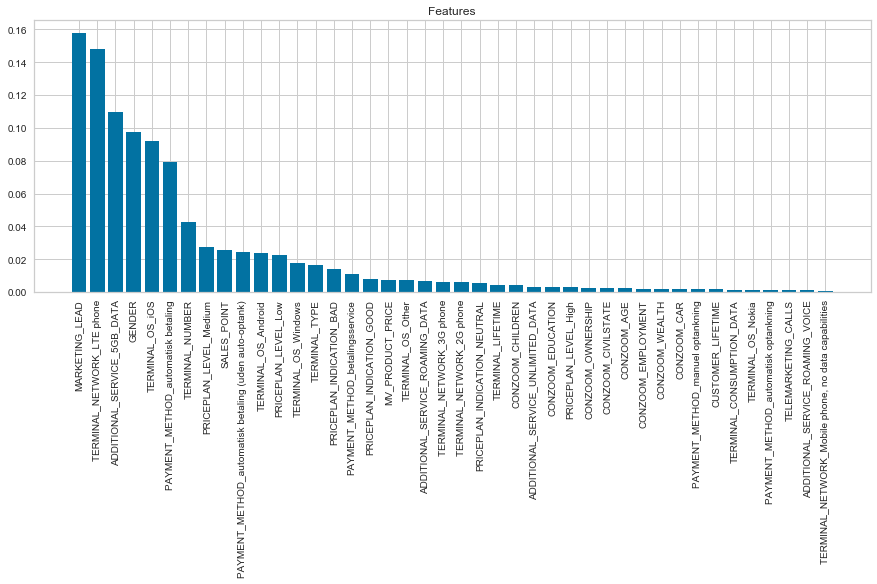

LGBMClassifier(boosting_type='gbdt', class_weight={0: 0.95, 1: 2},
        colsample_bytree=1.0, importance_type='split', learning_rate=0.9,
        max_depth=7, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=4, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     37645
           1       0.06      0.10      0.07       875

   micro avg       0.94      0.94      0.94     38520
   macro avg       0.52      0.53      0.52     38520
weighted avg       0.96      0.94      0.95     38520

Accuracy   Score :  0.9398494288681205
Score:  0.94 
F1 score:  0.072 
- - - - -  

Area under curve :  0.5310805836479896 



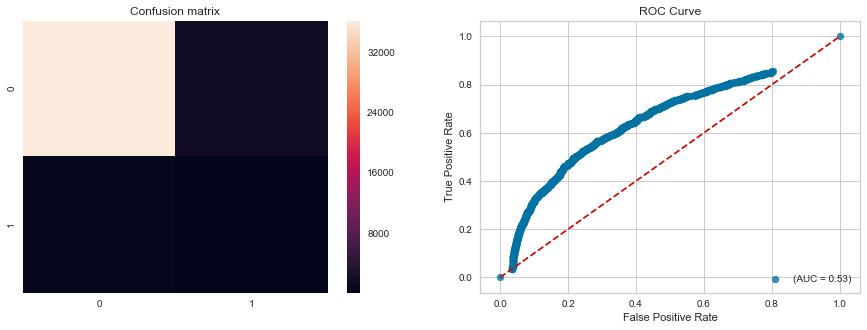

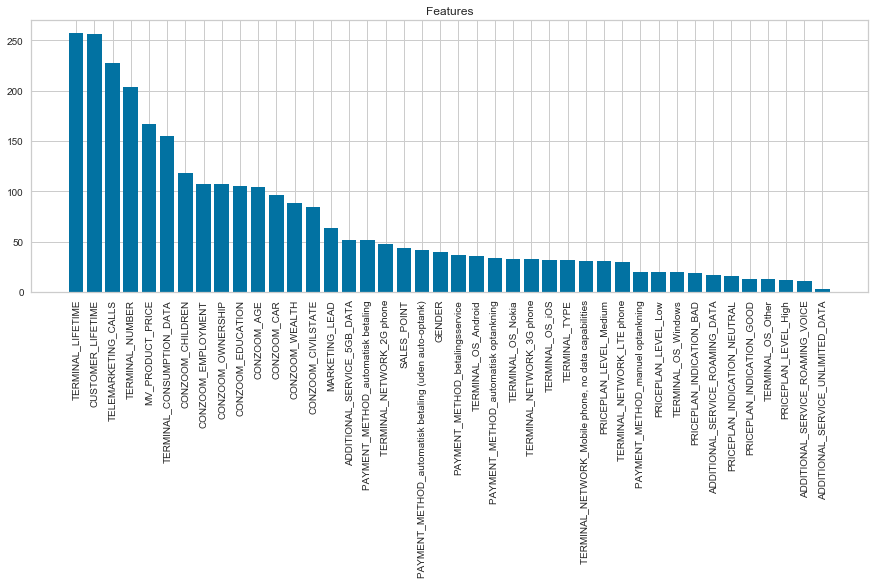

LogisticRegression(C=100, class_weight={0: 0.95, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.16      0.27     37645
           1       0.02      0.92      0.05       875

   micro avg       0.18      0.18      0.18     38520
   macro avg       0.51      0.54      0.16     38520
weighted avg       0.97      0.18      0.27     38520

Accuracy   Score :  0.17611630321910696
Score:  0.176 
F1 score:  0.048 
- - - - -  

Area under curve :  0.5394129366449728 



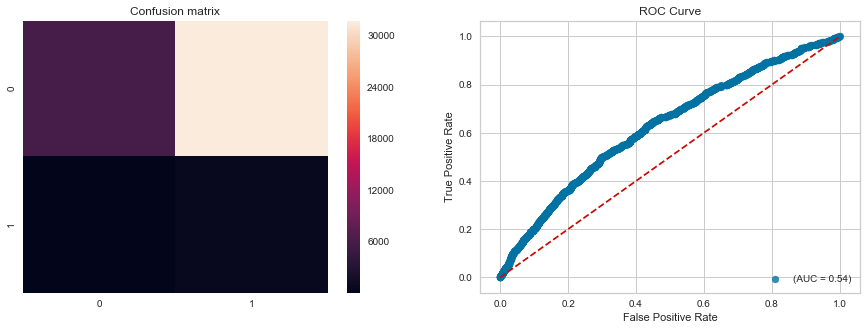

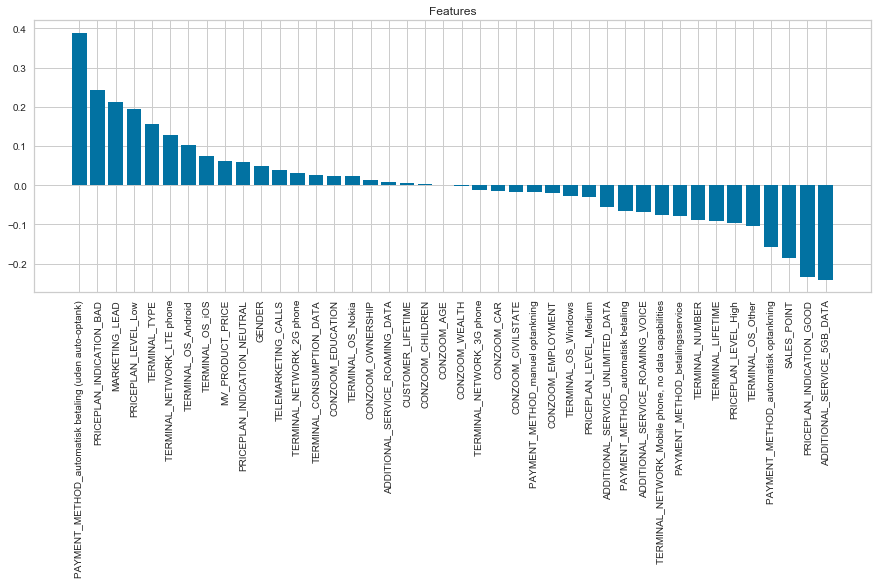

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.84      0.91     37645
           1       0.10      0.80      0.18       875

   micro avg       0.84      0.84      0.84     38520
   macro avg       0.55      0.82      0.55     38520
weighted avg       0.97      0.84      0.89     38520

Accuracy   Score :  0.8369158878504673
Score:  0.837 
F1 score:  0.182 
- - - - -  

Area under curve :  0.8177706771910517 

RandomForestClassifier(bootstrap=True, class_weight={0: 0.95, 1: 2},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=4, 

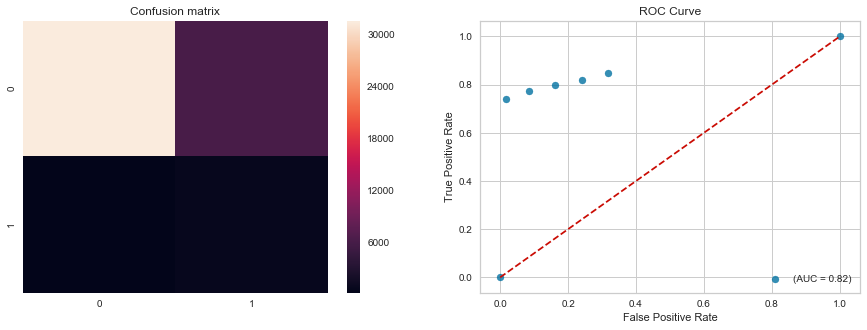

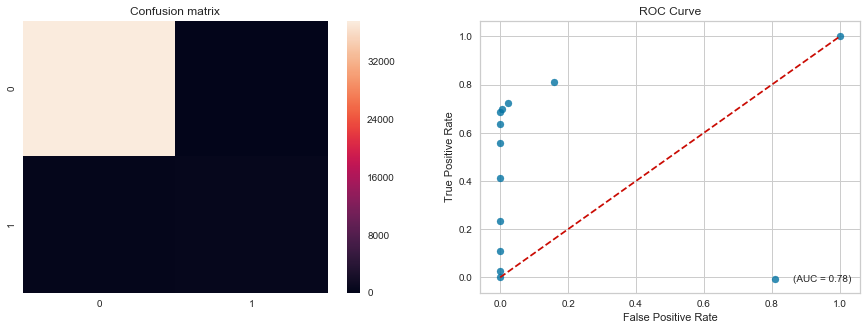

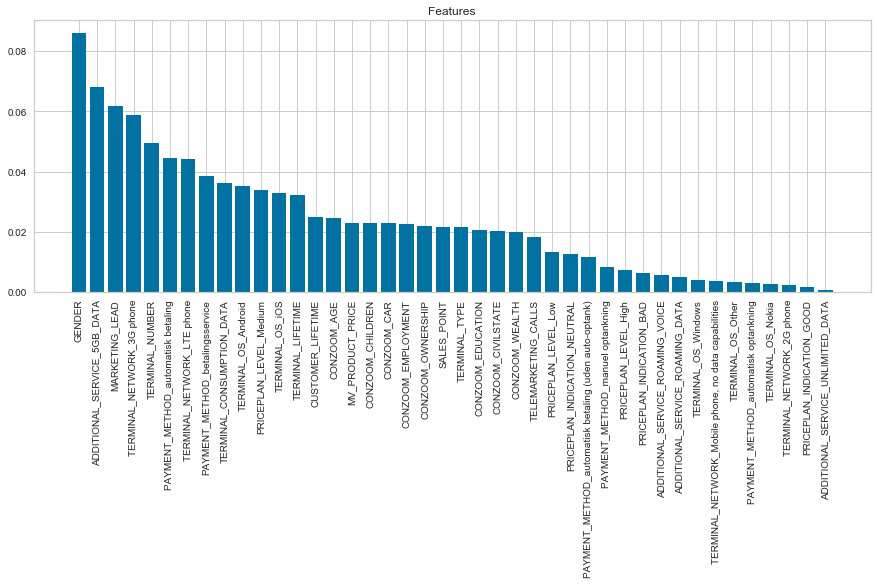

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 0.95, 1: 2},
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.9,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     37645
           1       0.91      0.62      0.74       875

   micro avg       0.99      0.99      0.99     38520
   macro avg       0.95      0.81      0.87     38520
weighted avg       0.99      0.99      0.99     38520

Accuracy   Score :  0.9899273104880582
Score:  0.99 
F1 score:  0.736 
- - - - -  

Area under curve :  0.8089837770145912 



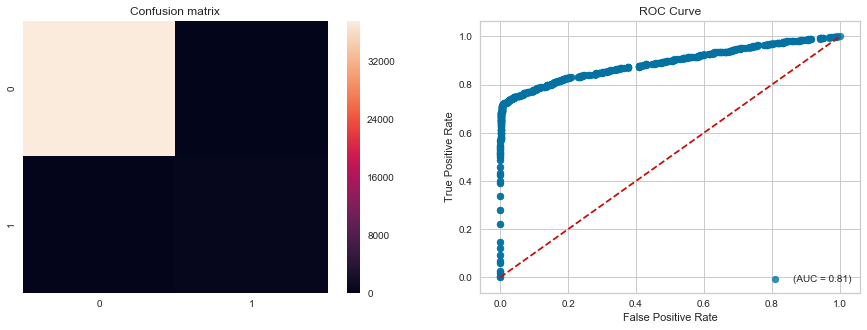

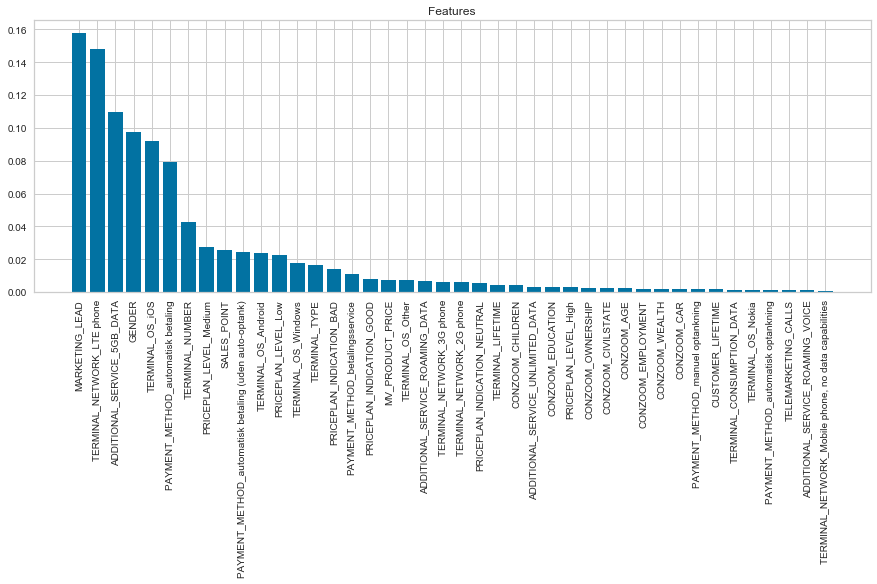

LGBMClassifier(boosting_type='gbdt', class_weight={0: 0.95, 1: 2},
        colsample_bytree=1.0, importance_type='split', learning_rate=0.9,
        max_depth=7, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=4, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     37645
           1       0.06      0.10      0.07       875

   micro avg       0.94      0.94      0.94     38520
   macro avg       0.52      0.53      0.52     38520
weighted avg       0.96      0.94      0.95     38520

Accuracy   Score :  0.9398494288681205
Score:  0.94 
F1 score:  0.072 
- - - - -  

Area under curve :  0.5310805836479896 



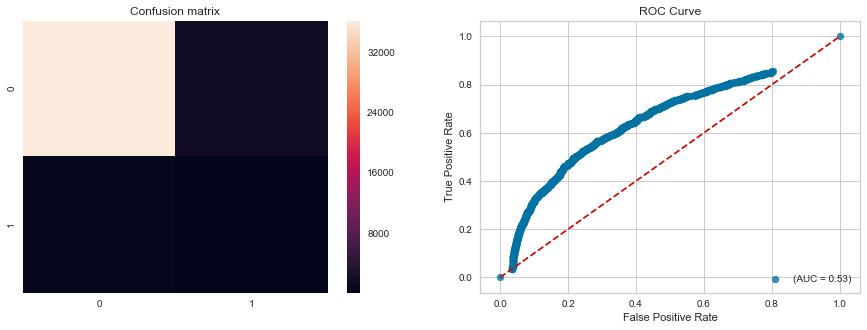

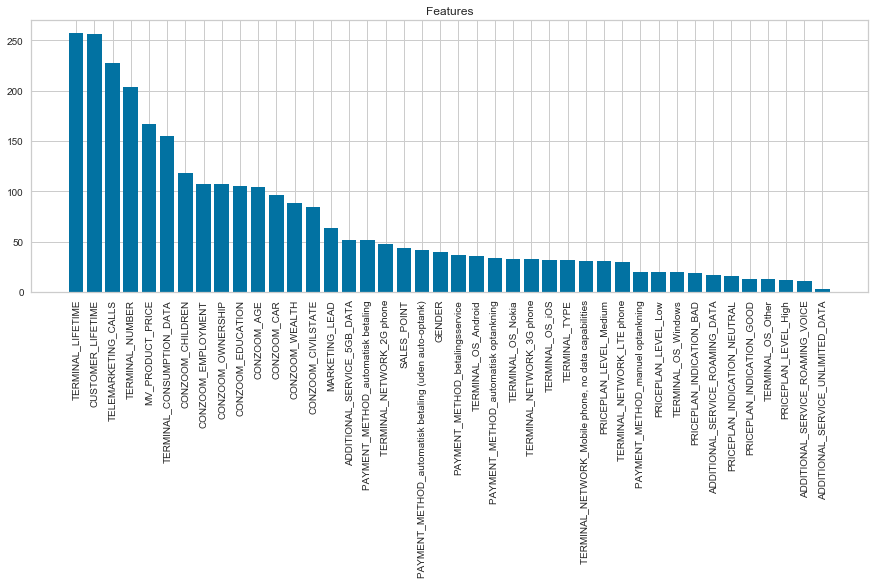

In [31]:
# Classifying data with either smote or normal dataset
Switch = [True,False]
dataset = ['SMOTE','RAW']
models = []

for i in range(len(Switch)):
    
    # Switch
    if Switch :
        x_train = os_smote_X
        y_train = os_smote_Y
    else:
        x_train = train_X
        y_train = train_Y
        

    
    classifiers = [
        [LogisticRegression(random_state=0, C=100,solver='lbfgs', multi_class='multinomial',class_weight = {0:0.95, 1:2}),'coef','LogReg',dataset[i]],
        [KNeighborsClassifier(n_jobs = 4),'non','KNN',dataset[i]],
        [RandomForestClassifier(n_jobs = 4,class_weight = {0:0.95, 1:2}),'feat','RandFor',dataset[i]],
        [XGBClassifier(n_jobs = 4, learning_rate=0.9, max_depth = 7,class_weight = {0:0.95, 1:2}),'feat','XGBClas',dataset[i]],
        [LGBMClassifier(n_jobs = 4, learning_rate=0.9, max_depth = 7,class_weight = {0:0.95, 1:2}),'feat','LGBMClas',dataset[i]]
    ]
        
    
    #Test Cross_validation RandFor
    #rf = RandomForestClassifier( n_estimators = 1000, max_features = 'log2', max_depth = 11, min_samples_split = 2, 
     #                         min_samples_leaf = 8, n_jobs = -1 , random_state = 42, class_weight = {0:0.95, 1:2})
    
    
    # Iterate Classifiers
    for item in classifiers:
        classifier_name = item[0]
        Model=churnPred(classifier_name,x_train,test_X,y_train,test_Y,cols,item[1],item[2])
        models.append(Model)


I trie eleminating features using both recursive feature elimination (Backward selection) and using Chi2. The best result came from Chi2, so I chose to leave this technique in here. The selected features are:

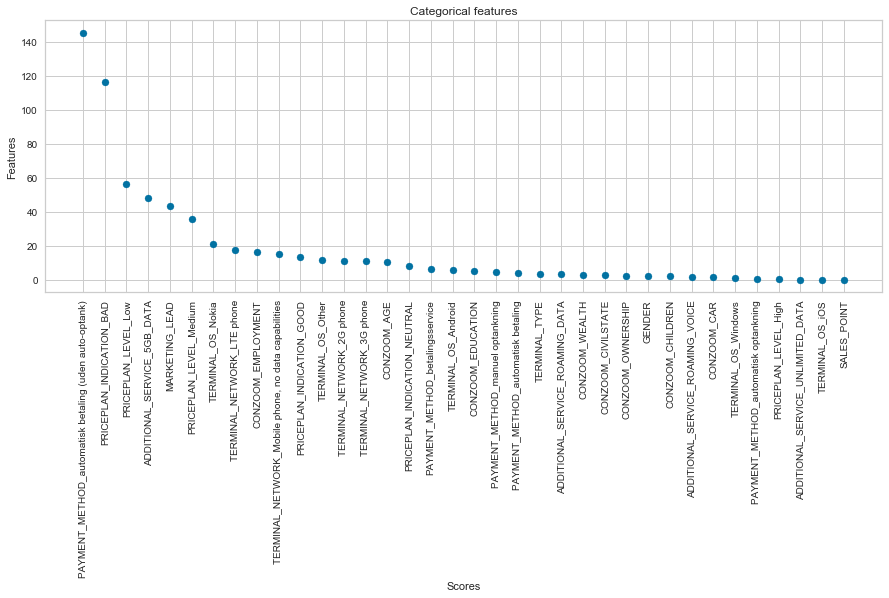

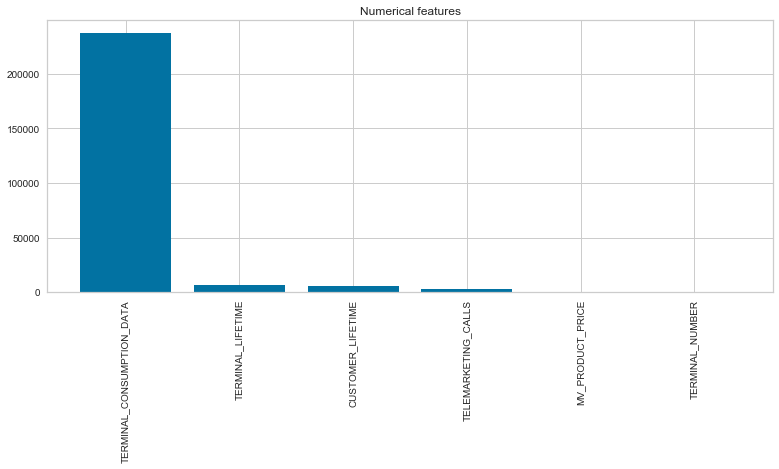

In [35]:
#--------------------------------------------------------------------------
#----------------------- Chi2 Feature Elimination----------------------
#--------------------------------------------------------------------------

#Select best k= 5
select = SelectKBest(score_func = chi2,k = 5)
fit   = select.fit(df_copy[cols],df_copy[target_col])

Perf = pd.DataFrame({"Collumns":cols,"Score":fit.scores_,"P_val":fit.pvalues_ })
Perf = Perf.sort_values(by = "Score" ,ascending =False)

#categorical and numerical columns
Perf["feature_type"] = np.where(Perf["Collumns"].isin(L_cat),"Numerical","Categorical")

ScatX = Perf[Perf["feature_type"] == "Categorical"]["Collumns"]
ScatY = Perf[Perf["feature_type"] == "Categorical"]["Score"]
fig, ax = plt.subplots(figsize=(15,5))
#plot roc curve
plt.scatter(ScatX,ScatY,c='b',marker='o')
plt.xticks(rotation=90)    
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Categorical features')
fig2, ax = plt.subplots(figsize=(13,5))
plt.bar(Perf[Perf["feature_type"] == "Numerical"]["Collumns"],
        Perf[Perf["feature_type"] == "Numerical"]["Score"])
plt.xticks(rotation=90)    
plt.title('Numerical features')
plt.show()

features_cat  = Perf[Perf["feature_type"] == "Categorical"]["Collumns"][:6].tolist()

features_num  = Perf[Perf["feature_type"] == "Numerical"]["Collumns"][:3].tolist()

Using these features the classification performance is established:

LogisticRegression(C=100, class_weight={0: 0.95, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.07      0.14     37645
           1       0.02      0.95      0.05       875

   micro avg       0.09      0.09      0.09     38520
   macro avg       0.50      0.51      0.09     38520
weighted avg       0.96      0.09      0.14     38520

Accuracy   Score :  0.09454828660436138
Score:  0.095 
F1 score:  0.046 
- - - - -  

Area under curve :  0.5133090715898525 



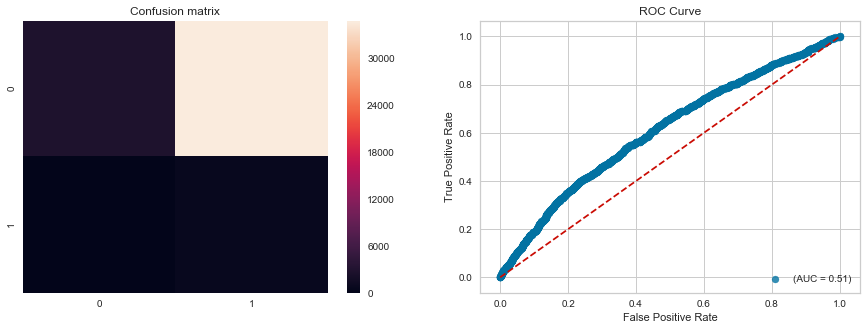

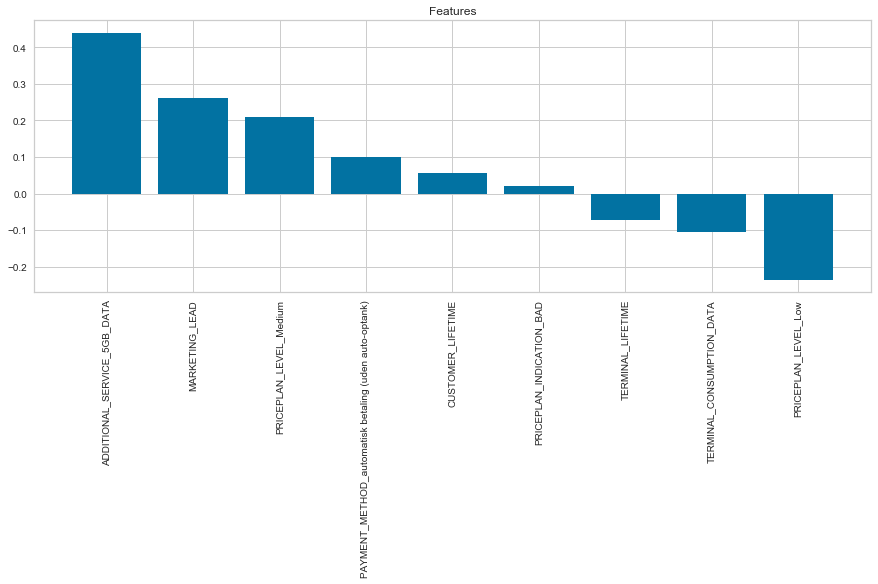

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     37645
           1       0.14      0.60      0.23       875

   micro avg       0.91      0.91      0.91     38520
   macro avg       0.57      0.76      0.59     38520
weighted avg       0.97      0.91      0.94     38520

Accuracy   Score :  0.9097352024922118
Score:  0.91 
F1 score:  0.233 
- - - - -  

Area under curve :  0.7606998463085592 

RandomForestClassifier(bootstrap=True, class_weight={0: 0.95, 1: 2},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=4, o

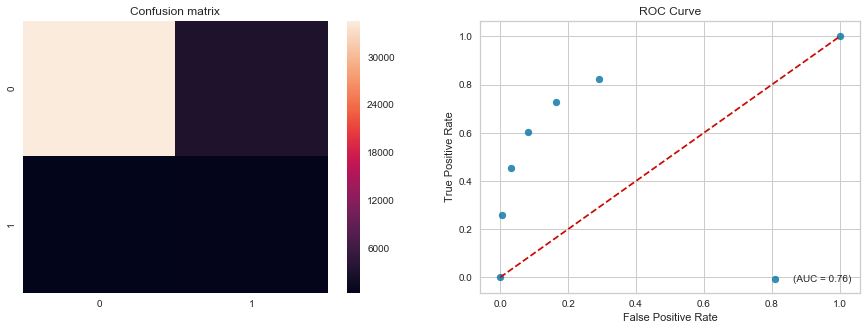

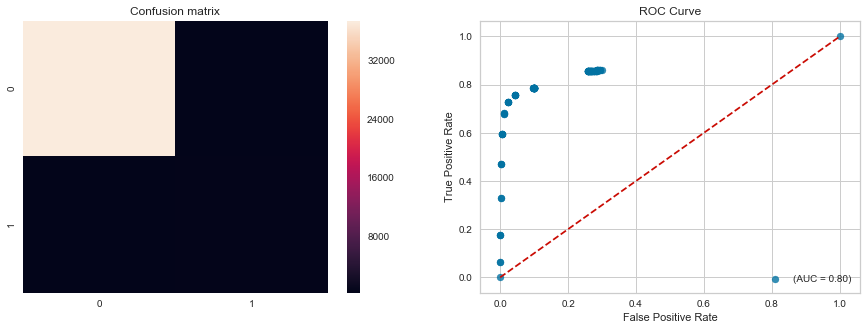

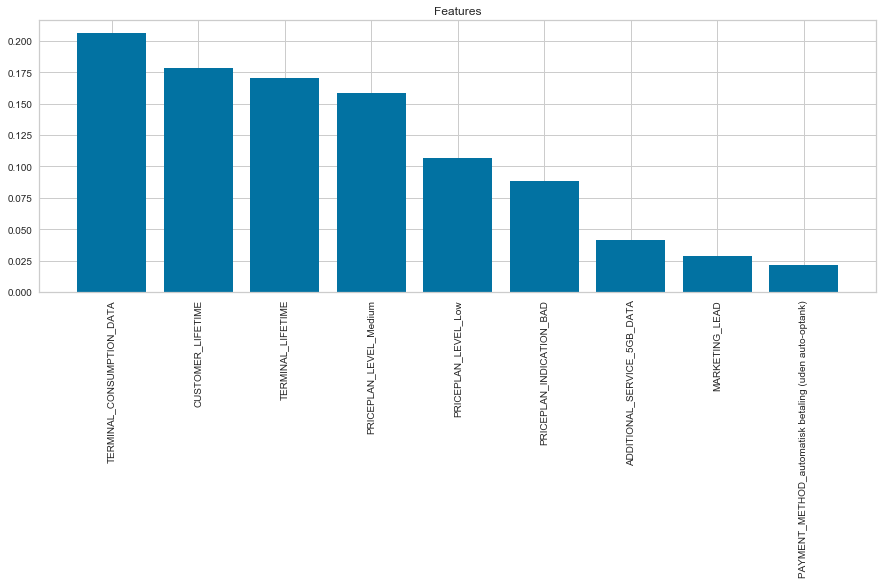

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 0.95, 1: 2},
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.9,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     37645
           1       0.57      0.18      0.28       875

   micro avg       0.98      0.98      0.98     38520
   macro avg       0.78      0.59      0.63     38520
weighted avg       0.97      0.98      0.97     38520

Accuracy   Score :  0.9782969885773624
Score:  0.978 
F1 score:  0.276 
- - - - -  

Area under curve :  0.589263305694173 



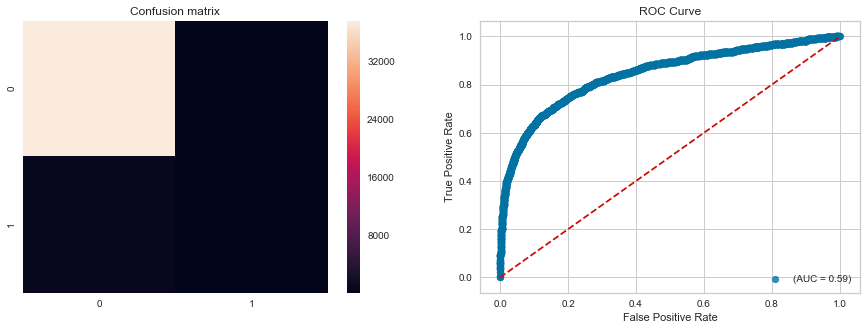

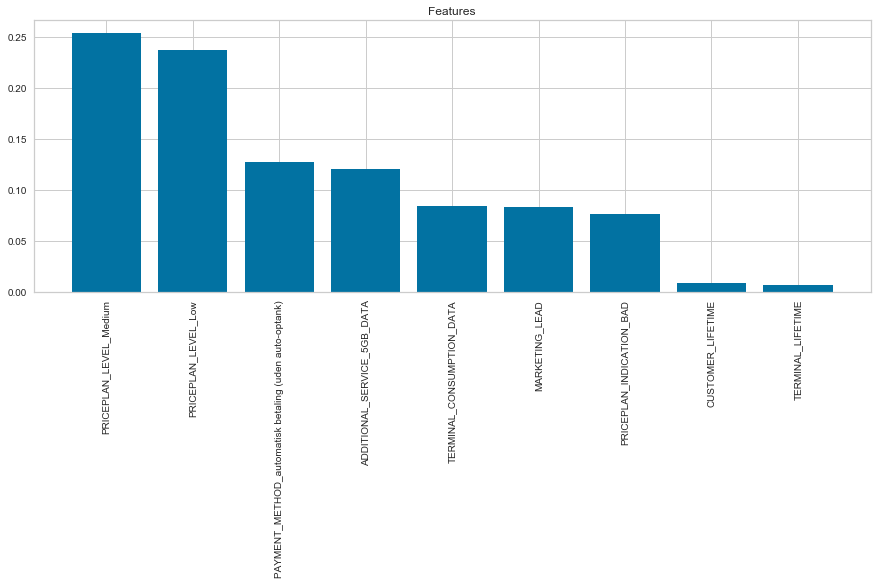

LGBMClassifier(boosting_type='gbdt', class_weight={0: 0.95, 1: 2},
        colsample_bytree=1.0, importance_type='split', learning_rate=0.9,
        max_depth=7, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=4, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     37645
           1       0.15      0.16      0.15       875

   micro avg       0.96      0.96      0.96     38520
   macro avg       0.56      0.57      0.57     38520
weighted avg       0.96      0.96      0.96     38520

Accuracy   Score :  0.9598909657320872
Score:  0.96 
F1 score:  0.154 
- - - - -  

Area under curve :  0.5697997457450239 



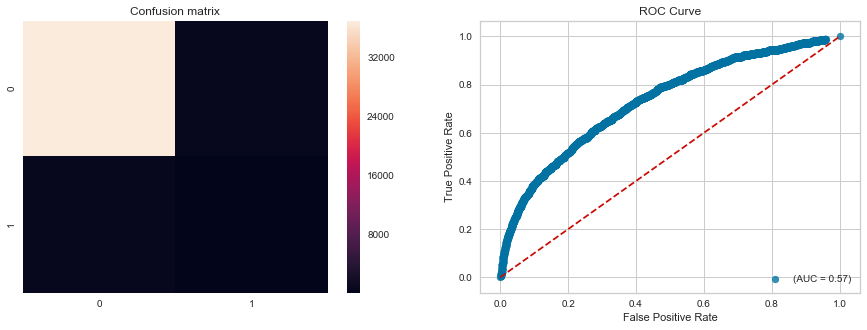

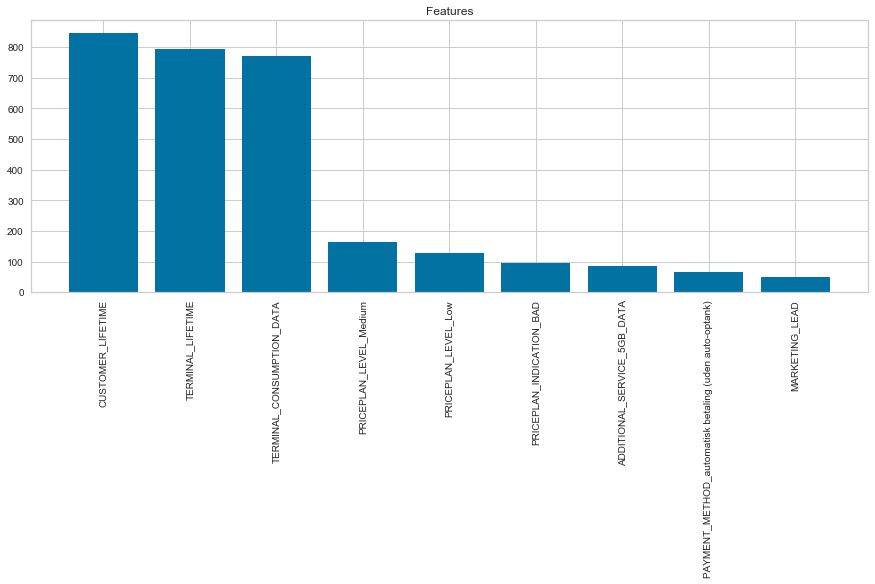

LogisticRegression(C=100, class_weight={0: 0.95, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.07      0.14     37645
           1       0.02      0.95      0.05       875

   micro avg       0.09      0.09      0.09     38520
   macro avg       0.50      0.51      0.09     38520
weighted avg       0.96      0.09      0.14     38520

Accuracy   Score :  0.09454828660436138
Score:  0.095 
F1 score:  0.046 
- - - - -  

Area under curve :  0.5133090715898525 



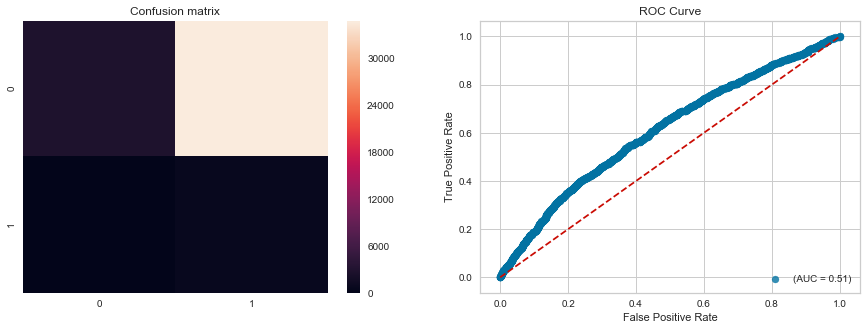

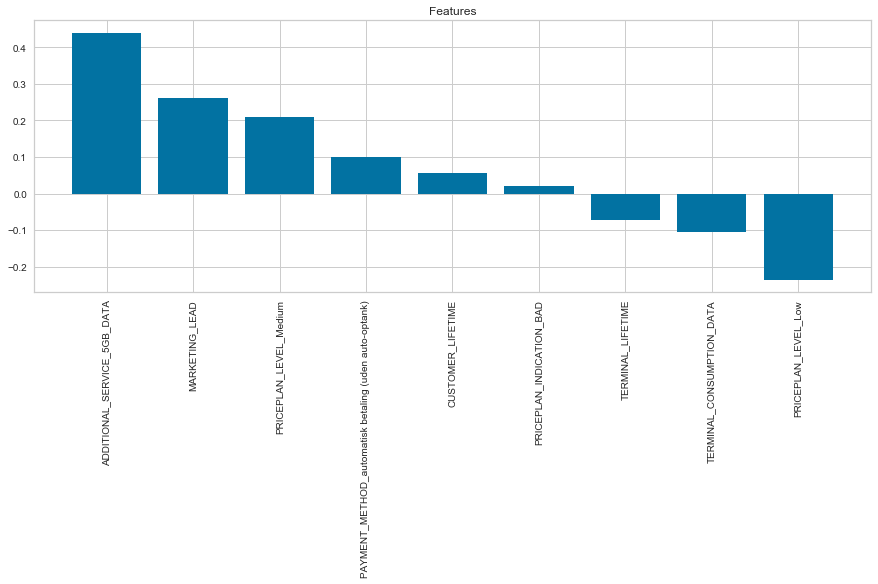

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=4, n_neighbors=5, p=2,
           weights='uniform')

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     37645
           1       0.14      0.60      0.23       875

   micro avg       0.91      0.91      0.91     38520
   macro avg       0.57      0.76      0.59     38520
weighted avg       0.97      0.91      0.94     38520

Accuracy   Score :  0.9097352024922118
Score:  0.91 
F1 score:  0.233 
- - - - -  

Area under curve :  0.7606998463085592 

RandomForestClassifier(bootstrap=True, class_weight={0: 0.95, 1: 2},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=4, o

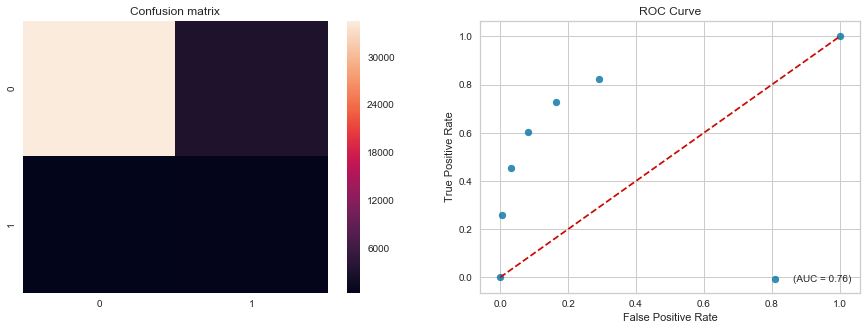

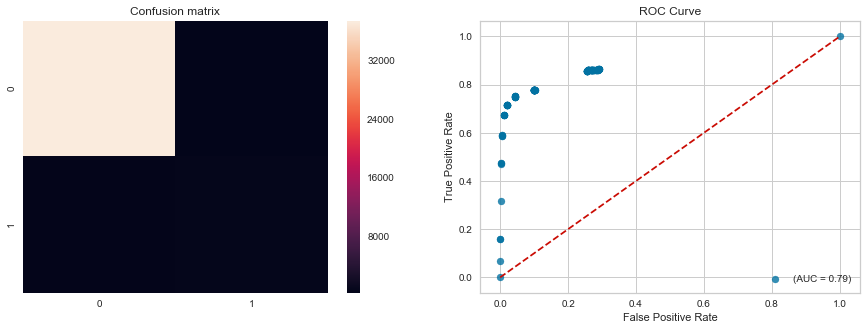

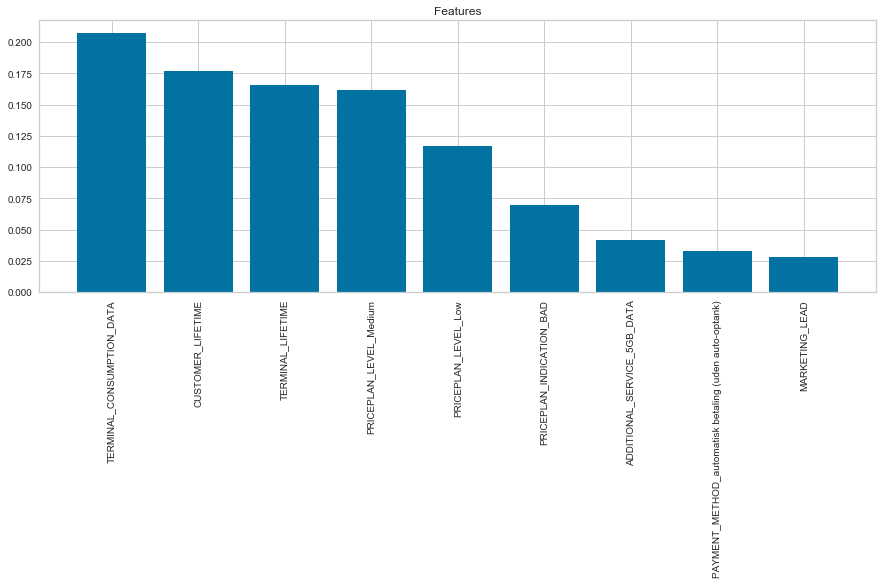

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 0.95, 1: 2},
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.9,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     37645
           1       0.57      0.18      0.28       875

   micro avg       0.98      0.98      0.98     38520
   macro avg       0.78      0.59      0.63     38520
weighted avg       0.97      0.98      0.97     38520

Accuracy   Score :  0.9782969885773624
Score:  0.978 
F1 score:  0.276 
- - - - -  

Area under curve :  0.589263305694173 



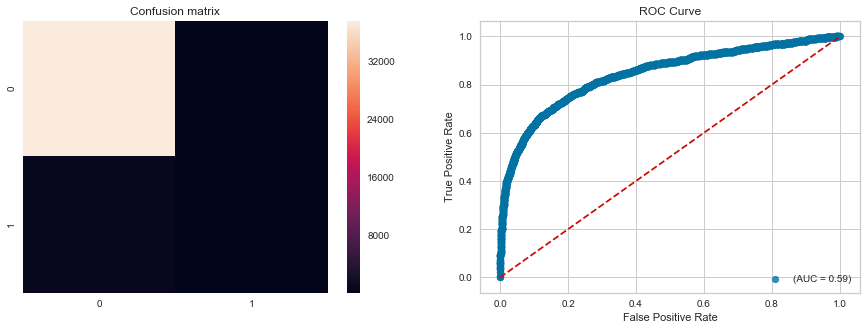

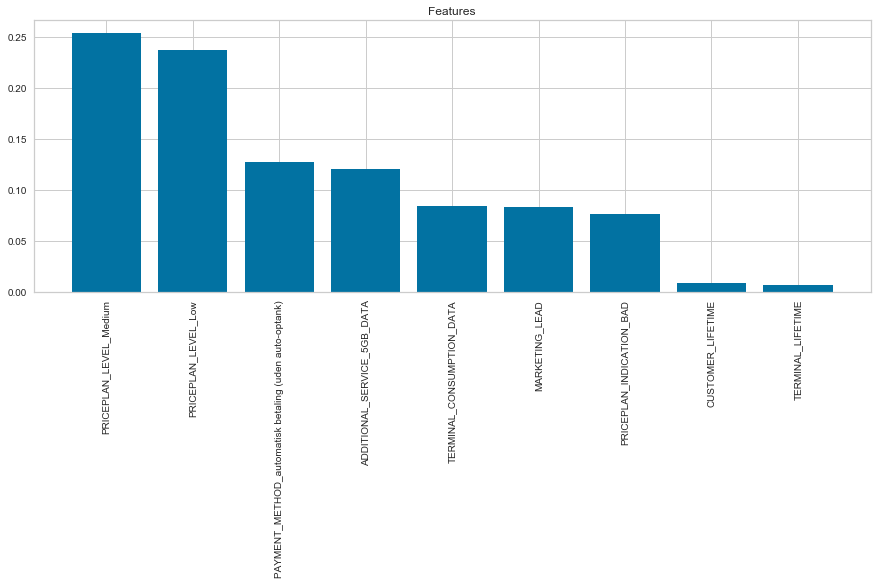

LGBMClassifier(boosting_type='gbdt', class_weight={0: 0.95, 1: 2},
        colsample_bytree=1.0, importance_type='split', learning_rate=0.9,
        max_depth=7, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=4, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     37645
           1       0.15      0.16      0.15       875

   micro avg       0.96      0.96      0.96     38520
   macro avg       0.56      0.57      0.57     38520
weighted avg       0.96      0.96      0.96     38520

Accuracy   Score :  0.9598909657320872
Score:  0.96 
F1 score:  0.154 
- - - - -  

Area under curve :  0.5697997457450239 



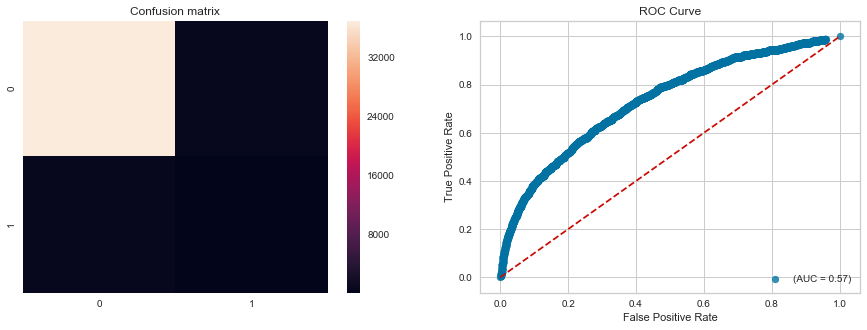

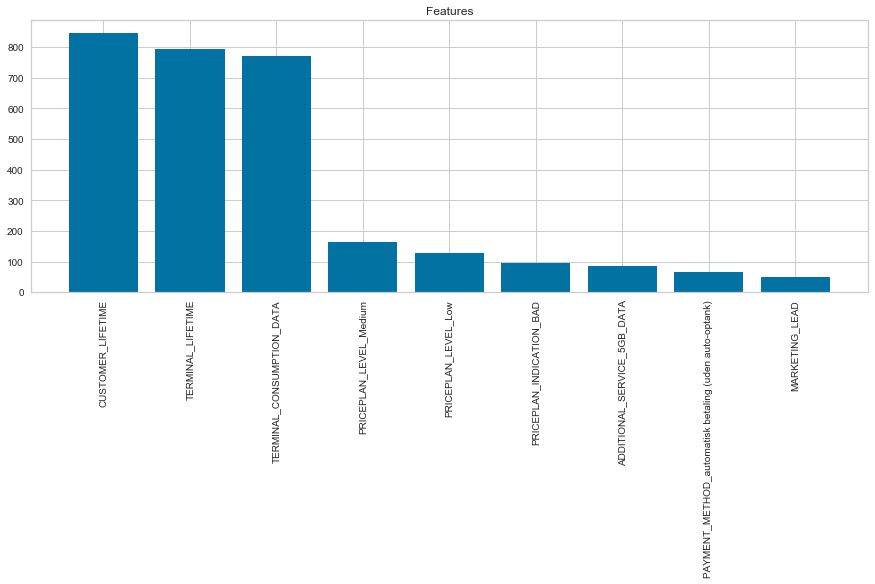

In [37]:
# Classifying data with either smote or normal dataset with feature elimination
Switch = [True,False]
dataset = ['SMOTE_feat_elim','RAW_feat_elim']
cols = [i for i in cols if i in list(features_cat)+list(features_num)]

for i in range(len(Switch)):
    
    # Switch
    if Switch :
        x_train = os_smote_X
        y_train = os_smote_Y
    else:
        x_train = train_X
        y_train = train_Y
    
    classifiers = [
        [LogisticRegression(random_state=0, C=100,solver='lbfgs', multi_class='multinomial',class_weight = {0:0.95, 1:2}),'coef','LogReg',dataset[i]],
        [KNeighborsClassifier(n_jobs = 4),'non','KNN',dataset[i]],
        [RandomForestClassifier(n_jobs = 4,class_weight = {0:0.95, 1:2}),'feat','RandFor',dataset[i]],
        [XGBClassifier(n_jobs = 4, learning_rate=0.9, max_depth = 7,class_weight = {0:0.95, 1:2}),'feat','XGBClas',dataset[i]],
        [LGBMClassifier(n_jobs = 4, learning_rate=0.9, max_depth = 7,class_weight = {0:0.95, 1:2}),'feat','LGBMClas',dataset[i]]
    ]
    
    # Iterate Classifiers
    for item in classifiers:
        classifier_name = item[0]
        Model=churnPred(classifier_name,x_train[list(features_cat)+list(features_num)],
                                                test_X[list(features_cat)+list(features_num)],
                                                y_train,
                                                test_Y,
                                                cols,item[1],item[2])
        models.append(Model)
        
Performances = pd.concat(models).reset_index()
Performances = Performances.drop(columns = "index",axis =1)


## Statistics

Lastly I will sum up the performances of my ML classifiers and chose the best one.

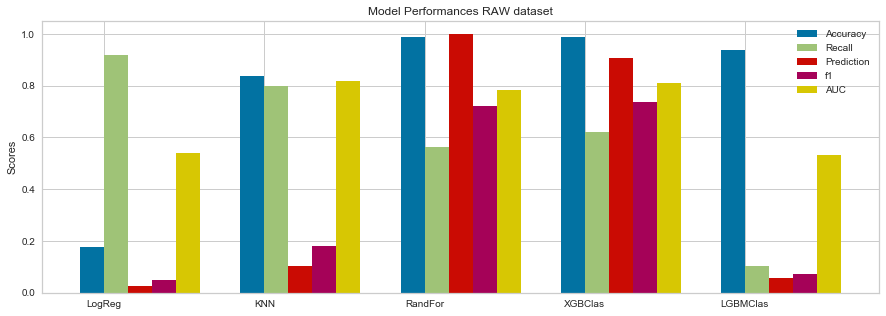

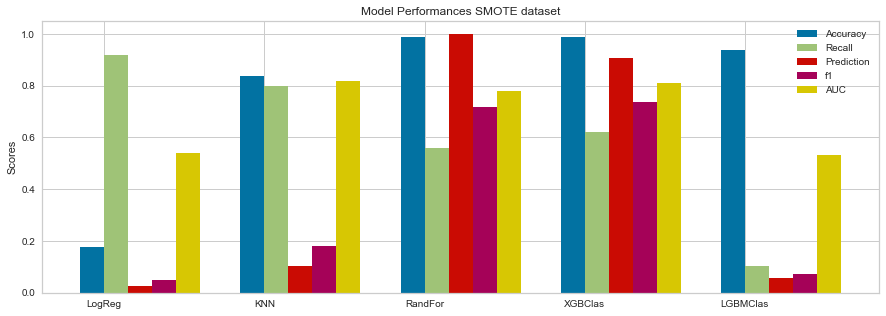

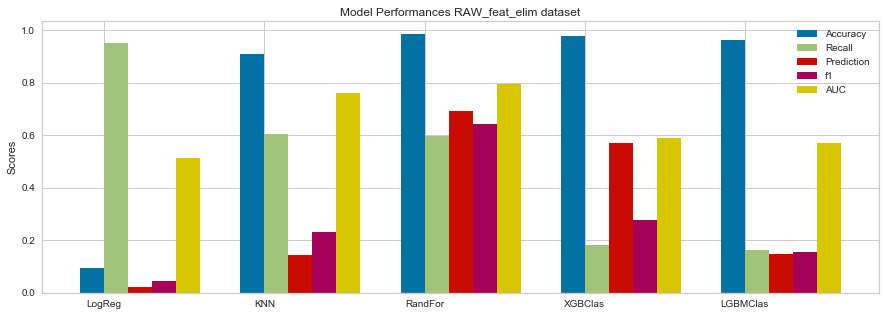

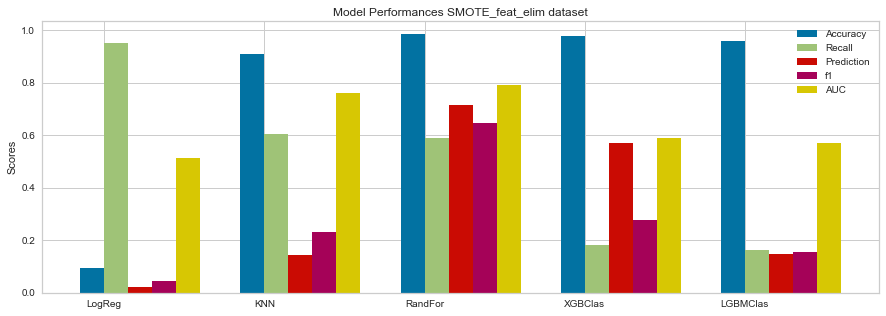

In [42]:
def histoStat(Performances,data) :
    fig = plt.subplots(figsize=(15,5))
    N = len(Performances.values[:,1])
    ind = np.arange(N) 
    width = 0.15   
    for i in range(N):
        plt.bar(ind+width*i, Performances.values[:,i+1], width, label=Performances.values[i,0])
    
    plt.ylabel('Scores')
    plt.title('Model Performances {} dataset'.format(data))
    
    plt.xticks(ind + width / 2, list(Performances.values[:,0]))
    plt.legend(['Accuracy','Recall','Prediction','f1','AUC'],loc='best')
    plt.show()
    
histoStat(Performances.iloc[:5],'RAW')
histoStat(Performances.iloc[5:10],'SMOTE')
histoStat(Performances.iloc[10:15],'RAW_feat_elim')
histoStat(Performances.iloc[15:20],'SMOTE_feat_elim')

The best classifier is the XBGClassifier, and its statistics were once again:

XGBClassifier(base_score=0.5, booster='gbtree', class_weight={0: 0.95, 1: 2},
       colsample_bylevel=1, colsample_bytree=1, gamma=0, learning_rate=0.9,
       max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     37629
           1       0.91      0.65      0.76       891

   micro avg       0.99      0.99      0.99     38520
   macro avg       0.95      0.82      0.88     38520
weighted avg       0.99      0.99      0.99     38520

Accuracy   Score :  0.9903946002076843
Score:  0.99 
F1 score:  0.757 
- - - - -  

Area under curve :  0.8225015039174332 



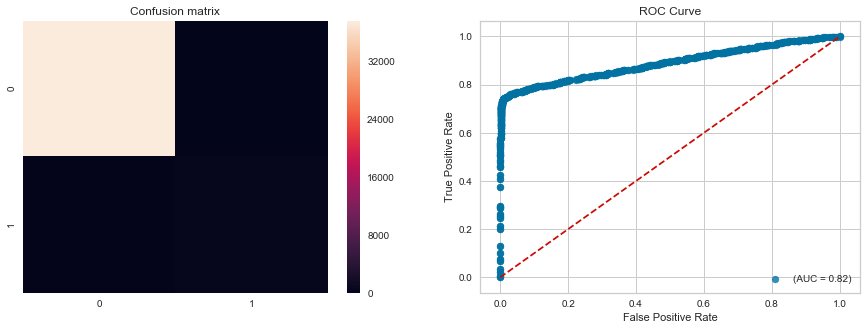

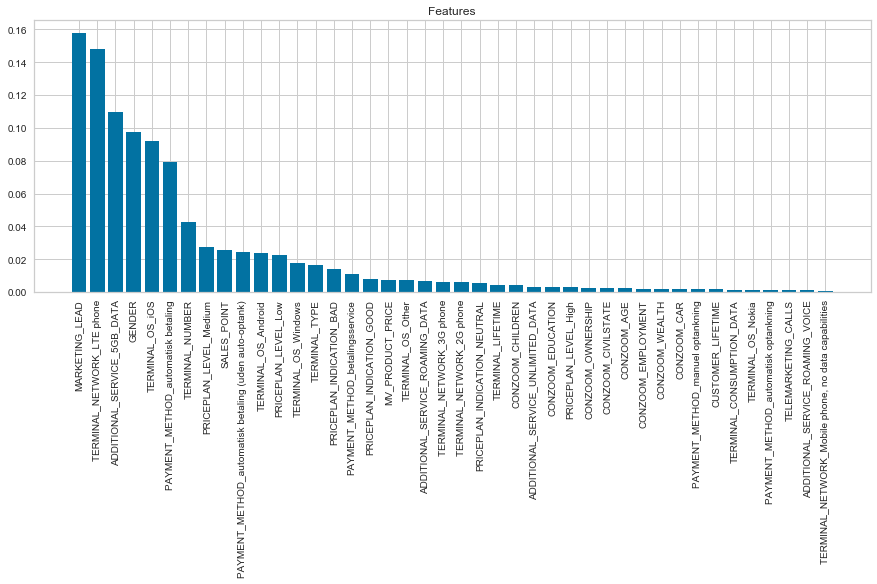

In [52]:
dataset = 'SMOTE'

x_train = os_smote_X
y_train = os_smote_Y

best_classifier = [[XGBClassifier(n_jobs = 4, learning_rate=0.9, max_depth = 7,class_weight = {0:0.95, 1:2}),'feat','XGBClas',dataset]]

# Iterate Classifiers
for item in best_classifier:
    classifier_name = item[0]
    churnPred(classifier_name,x_train,test_X,y_train,test_Y,cols,item[1],item[2])

## Analyse features from this classifier

When I calculated the features having the larges differences in Churn between values, the selected feautures were the following:

In [82]:
print(SelectedFeatures)

['PRICEPLAN_INDICATION' 'PRICEPLAN_LEVEL' 'SALES_POINT' 'TERMINAL_NETWORK'
 'TERMINAL_OS' 'TERMINAL_TYPE']


The classifier has a relatively high weight on the 'TERMINAL' features and the 'PRICEPLAN' feature which were part of the previously selected features. However the logic behind all the other features shown on the 'Feature weight' bar plot has to be determined. The most interesting feature is 'MARKETING_LEAD' which has the highest weight. This makes sense, since it determines if a customer wants to be contacted by not only Superb but also other companies. The 'TERMINAL_NETWORK', 'TERMINAL_OS', 'TERMINAL_NUMBER' and 'ADDITIONAL_SERVICE' features all indicate that the customers can be differentiated on how much they are into the TECH and how much they demand of the telecompany.    

In [89]:
best_classifier = XGBClassifier(n_jobs = 4, learning_rate=0.9, max_depth = 7,class_weight = {0:0.95, 1:2})
best_classifier.fit(x_train,y_train)

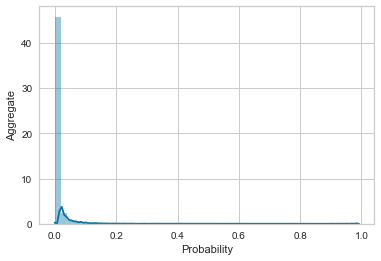

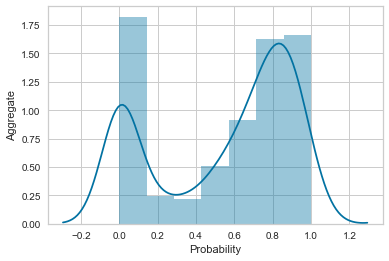

In [114]:
Churned = test_X[test_Y==1]
NChurned = test_X[test_Y==0]
Prob_churned = best_classifier.predict_proba(Churned)
Prob_Nchurned = best_classifier.predict_proba(NChurned)
sns.distplot(Prob_Nchurned[:, 1])
plt.xlabel('Probability')
plt.ylabel('Aggregate')
plt.show();
sns.distplot(Prob_churned[:, 1])
plt.xlabel('Probability')
plt.ylabel('Aggregate')
plt.show();